In [1]:
import numpy as np
import scipy.optimize as opt
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
raw_data = pd.read_csv('Part2_data.csv')
raw_data = pd.DataFrame(raw_data).to_numpy()
raw_accel = raw_data[:,2]
raw_force = raw_data[:,4]
raw_time = raw_data[:,0]


In [3]:
accel_interp = interp1d(raw_time, raw_accel, kind="linear")
force_interp = interp1d(raw_time, raw_force, kind="linear")

start_time = 5
stop_time = 20
step_size = 0.005
time = np.arange(start_time, stop_time, step_size)

accel = accel_interp(time)
force = force_interp(time)


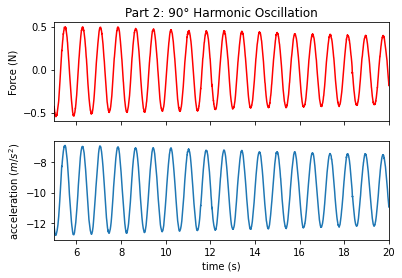

In [4]:
# Two subplots, the axes array is shared
# Choose the sensor for fitting.
f, axarr = plt.subplots(2, sharex=True)
plt.xlim(start_time, stop_time)
axarr[0].plot(time, force,'r')
axarr[0].set_title('Part 2: 90° Harmonic Oscillation')
axarr[0].set_ylabel('Force (N)')
axarr[1].plot(time, accel)
axarr[1].set_xlabel('time (s)')
axarr[1].set_ylabel('acceleration $(m/s^2)$')
plt.show()


In [5]:
# Defines the various oscillator models that we fit to:

# Simple harmonic motion using acceleration
def simple_a(t, A, B, w, phi):                  # inputs: t:time, A:amplitude, B:offset, w:angular frequency, phi:phase
    return B - A * (w**2) * np.cos(w*t + phi)   # output: acceleration


# Velocity-dependent friction using acceleration
def vdamped_a(t, A, B, w, phi, beta):    # inputs: t:time, A:amplitude, B:offset, w:ang. frequency, phi:phase, beta:damping
    return B + A * np.exp(-beta*t) * ((beta**2-w**2)*np.cos(w*t + phi)+2*beta*w*np.sin(w*t+phi))   # output: acceleration

Ainit, Binit, winit, phiinit, betainit=[0.045, -9.84, 7.93, -2.6, 0.4]


In [6]:
oscillator_model = simple_a

start_pars=[Ainit, Binit, winit, phiinit]
pars, cov = opt.curve_fit(oscillator_model, time, accel, p0=start_pars)

[A, B, w, phi] = pars
std_errs = np.sqrt(np.diag(cov))
[A_err, B_err, w_err, phi_err] = std_errs

print(np.transpose([pars, std_errs]))
T = 2*np.pi/w
print("Oscillation period: ", T)
k = 0.2433 * w ** 2
print("Spring constant", k)

accel_pred = oscillator_model(time, A, B, w, phi)


[[ 4.12440909e-02  5.77515792e-05]
 [-9.84522730e+00  2.56621689e-03]
 [ 7.93063914e+00  3.23458918e-04]
 [-2.61580172e+00  4.29509227e-03]]
Oscillation period:  0.7922672054260377
Spring constant 15.302362535835535


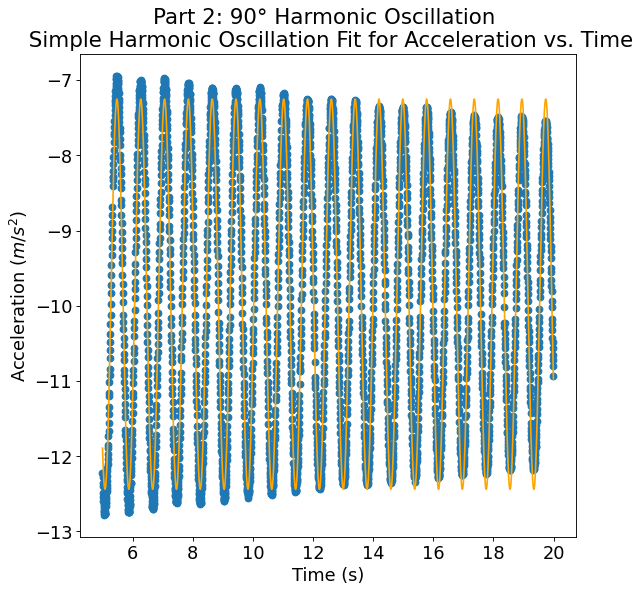

In [7]:
# Best-fit plots

# Sets figure size etc.
fig1=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '16'})

# Data and fit
plt.scatter(time, accel)
plt.plot(time, accel_pred, color='orange', label=r'fit, $B - A \omega ^ 2 cos(\omega t - \phi)$')

# Axes label and title
plt.title("Part 2: 90° Harmonic Oscillation \n Simple Harmonic Oscillation Fit for Acceleration vs. Time")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration $(m/s^2)$")
# plt.legend(loc='upper right', prop={'size': 13})
plt.show()

In [8]:
oscillator_model = vdamped_a

start_pars=[Ainit, Binit, winit, phiinit, betainit]
pars, cov = opt.curve_fit(oscillator_model, time, accel, p0=start_pars)

[A, B, w, phi, beta] = pars
std_errs = np.sqrt(np.diag(cov))

print(np.transpose([pars, std_errs]))
print("Damping factor: ", beta)
T = 2*np.pi/w
print("Oscillation period: ", T)

accel_pred = oscillator_model(time, A, B, w, phi, beta)



[[ 5.08120320e-02  5.79973935e-05]
 [-9.84106554e+00  7.19444289e-04]
 [ 7.93033721e+00  9.11633843e-05]
 [-2.61661643e+00  1.15525596e-03]
 [ 1.69818314e-02  9.08069100e-05]]
Damping factor:  0.016981831377361513
Oscillation period:  0.7922973685716299


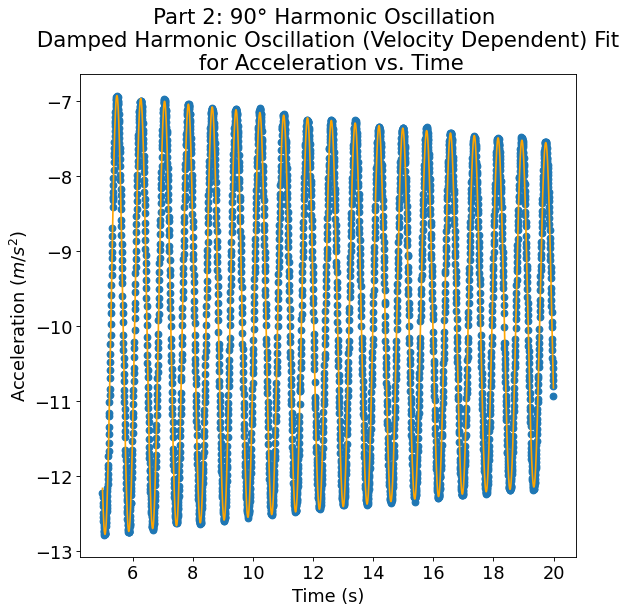

In [9]:
# Best-fit plots

# Sets figure size etc.
fig1=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '16'})

# Data and fit
plt.scatter(time, accel)
plt.plot(time, accel_pred, color='orange', label=r'fit, $B - A \omega ^ 2 cos(\omega t - \phi)$')

# Axes label and title
plt.title("Part 2: 90° Harmonic Oscillation \n Damped Harmonic Oscillation (Velocity Dependent) Fit \n for Acceleration vs. Time", wrap=True)
plt.xlabel("Time (s)")
plt.ylabel("Acceleration $(m/s^2)$")
plt.show()
